### Creation of figure 4 (PFI box and whisker plot)

Imports

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
# import local paths
from configpaths import dlproj_main, figsave_path

Select model number 25

In [2]:
data_ = xr.open_dataset(f'{dlproj_main}/model25_pfidata.nc')

In [3]:
auc_current_ = data_['auc_current_'].values
csi_current_ = data_['csi_current_'].values
bss_current_ = data_['bss_current_'].values

auc_future_ = data_['auc_future_'].values
csi_future_ = data_['csi_future_'].values
bss_future_ = data_['bss_future_'].values

auc_outlier_ = data_['auc_outlier_'].values
csi_outlier_ = data_['csi_outlier_'].values
bss_outlier_ = data_['bss_outlier_'].values

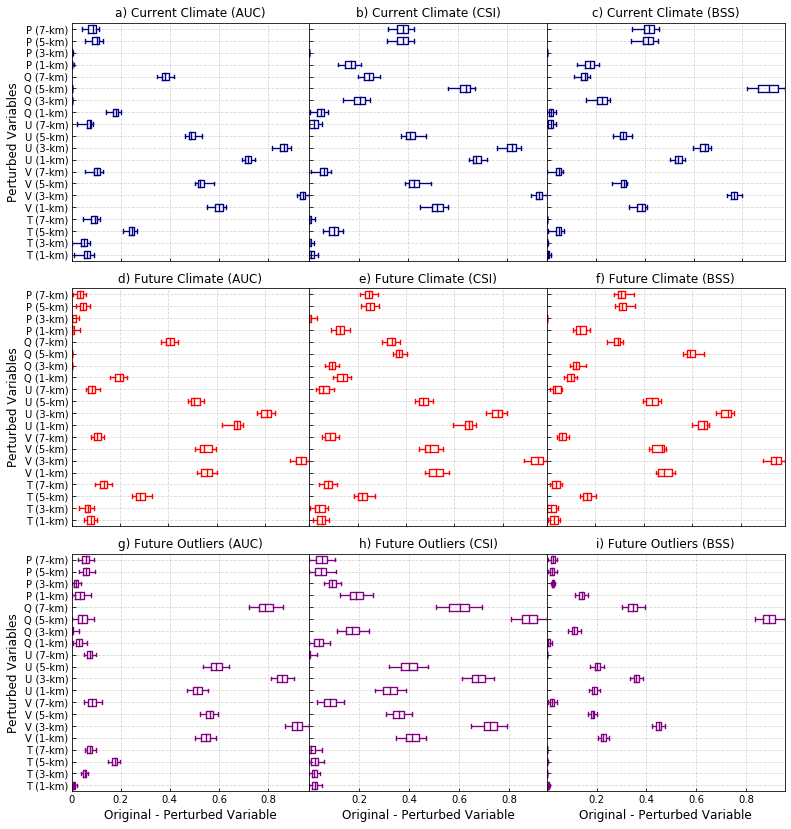

In [4]:
# %-----------------------------------------------------

fig = plt.figure(figsize=(11.,11.))

# %-----------------------------------------------------

ax1 = fig.add_axes([0.0, 0.67, 0.3, 0.3])

ax1.set_title("a) Current Climate (AUC)", fontsize=12)

bp = ax1.boxplot([auc_current_[0]/auc_current_.max(),
                  auc_current_[1]/auc_current_.max(),
                  auc_current_[2]/auc_current_.max(),
                  auc_current_[3]/auc_current_.max(),
                  auc_current_[4]/auc_current_.max(),
                  auc_current_[5]/auc_current_.max(),
                  auc_current_[6]/auc_current_.max(),
                  auc_current_[7]/auc_current_.max(),
                  auc_current_[8]/auc_current_.max(),
                  auc_current_[9]/auc_current_.max(),
                  auc_current_[10]/auc_current_.max(),
                  auc_current_[11]/auc_current_.max(),
                  auc_current_[12]/auc_current_.max(),
                  auc_current_[13]/auc_current_.max(),
                  auc_current_[14]/auc_current_.max(),
                  auc_current_[15]/auc_current_.max(),
                  auc_current_[16]/auc_current_.max(),
                  auc_current_[17]/auc_current_.max(),
                  auc_current_[18]/auc_current_.max(),
                  auc_current_[19]/auc_current_.max()],
                  notch=False, sym='x', showfliers=False, showmeans=False, 
                  widths=0.6, whis=(5, 95),
                  vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='navy', lw=1.35)
plt.setp(bp['whiskers'], color='navy', lw=1.35)
plt.setp(bp['caps'], color='navy', lw=1.35)
plt.setp(bp['medians'], color='navy', lw=1.35)

ax1.set_ylabel('Perturbed Variables', fontsize=12)
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax1.margins(x=0)

ax1.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax1.set_yticklabels(["T (1-km)","T (3-km)","T (5-km)","T (7-km)",
                     "V (1-km)","V (3-km)","V (5-km)","V (7-km)",
                     "U (1-km)","U (3-km)","U (5-km)","U (7-km)",
                     "Q (1-km)","Q (3-km)","Q (5-km)","Q (7-km)",
                     "P (1-km)","P (3-km)","P (5-km)","P (7-km)"], fontsize=10)

ax1.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.tick_params(axis='y', which='both', direction='in', left=True, labelleft=True)
        
# %-----------------------------------------------------
    
ax2 = fig.add_axes([0.30, 0.67, 0.3, 0.3])

ax2.set_title("b) Current Climate (CSI)", fontsize=12)

bp = ax2.boxplot([csi_current_[0]/csi_current_.max(),
                  csi_current_[1]/csi_current_.max(),
                  csi_current_[2]/csi_current_.max(),
                  csi_current_[3]/csi_current_.max(),
                  csi_current_[4]/csi_current_.max(),
                  csi_current_[5]/csi_current_.max(),
                  csi_current_[6]/csi_current_.max(),
                  csi_current_[7]/csi_current_.max(),
                  csi_current_[8]/csi_current_.max(),
                  csi_current_[9]/csi_current_.max(),
                  csi_current_[10]/csi_current_.max(),
                  csi_current_[11]/csi_current_.max(),
                  csi_current_[12]/csi_current_.max(),
                  csi_current_[13]/csi_current_.max(),
                  csi_current_[14]/csi_current_.max(),
                  csi_current_[15]/csi_current_.max(),
                  csi_current_[16]/csi_current_.max(),
                  csi_current_[17]/csi_current_.max(),
                  csi_current_[18]/csi_current_.max(),
                  csi_current_[19]/csi_current_.max()],
                  notch=False, sym='x', showfliers=False, showmeans=False, 
                  widths=0.6, whis=(5, 95),
                  vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='navy', lw=1.35)
plt.setp(bp['whiskers'], color='navy', lw=1.35)
plt.setp(bp['caps'], color='navy', lw=1.35)
plt.setp(bp['medians'], color='navy', lw=1.35)

ax2.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax2.margins(x=0)

ax2.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax2.set_yticklabels([], fontsize=10)

ax2.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.tick_params(axis='y', which='both', direction='in', left=True, labelleft=False)

# %-----------------------------------------------------

ax22 = fig.add_axes([0.60, 0.67, 0.3, 0.3])

ax22.set_title("c) Current Climate (BSS)", fontsize=12)

bp = ax22.boxplot([bss_current_[0]/bss_current_.max(),
                   bss_current_[1]/bss_current_.max(),
                   bss_current_[2]/bss_current_.max(),
                   bss_current_[3]/bss_current_.max(),
                   bss_current_[4]/bss_current_.max(),
                   bss_current_[5]/bss_current_.max(),
                   bss_current_[6]/bss_current_.max(),
                   bss_current_[7]/bss_current_.max(),
                   bss_current_[8]/bss_current_.max(),
                   bss_current_[9]/bss_current_.max(),
                   bss_current_[10]/bss_current_.max(),
                   bss_current_[11]/bss_current_.max(),
                   bss_current_[12]/bss_current_.max(),
                   bss_current_[13]/bss_current_.max(),
                   bss_current_[14]/bss_current_.max(),
                   bss_current_[15]/bss_current_.max(),
                   bss_current_[16]/bss_current_.max(),
                   bss_current_[17]/bss_current_.max(),
                   bss_current_[18]/bss_current_.max(),
                   bss_current_[19]/bss_current_.max()],
                   notch=False, sym='x', showfliers=False, showmeans=False, widths=0.6, whis=(5, 95),
                   vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='navy', lw=1.35)
plt.setp(bp['whiskers'], color='navy', lw=1.35)
plt.setp(bp['caps'], color='navy', lw=1.35)
plt.setp(bp['medians'], color='navy', lw=1.35)

ax22.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax22.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax22.margins(x=0)

ax22.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax22.set_yticklabels([], fontsize=10)

ax22.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax22.grid(True, linestyle='--', alpha=0.5)
ax22.tick_params(axis='y', which='both', direction='in', left=True, labelleft=False)

# %-----------------------------------------------------

ax3 = fig.add_axes([0.0, 0.335, 0.3, 0.3])

ax3.set_title("d) Future Climate (AUC)", fontsize=12)

bp = ax3.boxplot([auc_future_[0]/auc_future_.max(),
                  auc_future_[1]/auc_future_.max(),
                  auc_future_[2]/auc_future_.max(),
                  auc_future_[3]/auc_future_.max(),
                  auc_future_[4]/auc_future_.max(),
                  auc_future_[5]/auc_future_.max(),
                  auc_future_[6]/auc_future_.max(),
                  auc_future_[7]/auc_future_.max(),
                  auc_future_[8]/auc_future_.max(),
                  auc_future_[9]/auc_future_.max(),
                  auc_future_[10]/auc_future_.max(),
                  auc_future_[11]/auc_future_.max(),
                  auc_future_[12]/auc_future_.max(),
                  auc_future_[13]/auc_future_.max(),
                  auc_future_[14]/auc_future_.max(),
                  auc_future_[15]/auc_future_.max(),
                  auc_future_[16]/auc_future_.max(),
                  auc_future_[17]/auc_future_.max(),
                  auc_future_[18]/auc_future_.max(),
                  auc_future_[19]/auc_future_.max()],
                  notch=False, sym='x', showfliers=False, showmeans=False, widths=0.6, whis=(5, 95),
                  vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='r', lw=1.35)
plt.setp(bp['whiskers'], color='r', lw=1.35)
plt.setp(bp['caps'], color='r', lw=1.35)
plt.setp(bp['medians'], color='r', lw=1.35)

ax3.set_ylabel('Perturbed Variables', fontsize=12)

ax3.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax3.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax3.margins(x=0)

ax3.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax3.set_yticklabels(["T (1-km)","T (3-km)","T (5-km)","T (7-km)",
                     "V (1-km)","V (3-km)","V (5-km)","V (7-km)",
                     "U (1-km)","U (3-km)","U (5-km)","U (7-km)",
                     "Q (1-km)","Q (3-km)","Q (5-km)","Q (7-km)",
                     "P (1-km)","P (3-km)","P (5-km)","P (7-km)"], fontsize=10)

ax3.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.tick_params(axis='y', which='both', direction='in', left=True, labelleft=True)

# %-----------------------------------------------------

ax33 = fig.add_axes([0.3, 0.335, 0.3, 0.3])

ax33.set_title("e) Future Climate (CSI)", fontsize=12)

bp = ax33.boxplot([csi_future_[0]/csi_future_.max(),
                   csi_future_[1]/csi_future_.max(),
                   csi_future_[2]/csi_future_.max(),
                   csi_future_[3]/csi_future_.max(),
                   csi_future_[4]/csi_future_.max(),
                   csi_future_[5]/csi_future_.max(),
                   csi_future_[6]/csi_future_.max(),
                   csi_future_[7]/csi_future_.max(),
                   csi_future_[8]/csi_future_.max(),
                   csi_future_[9]/csi_future_.max(),
                   csi_future_[10]/csi_future_.max(),
                   csi_future_[11]/csi_future_.max(),
                   csi_future_[12]/csi_future_.max(),
                   csi_future_[13]/csi_future_.max(),
                   csi_future_[14]/csi_future_.max(),
                   csi_future_[15]/csi_future_.max(),
                   csi_future_[16]/csi_future_.max(),
                   csi_future_[17]/csi_future_.max(),
                   csi_future_[18]/csi_future_.max(),
                   csi_future_[19]/csi_future_.max()],
             notch=False, sym='x', showfliers=False, showmeans=False, widths=0.6, whis=(5, 95),
             vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='r', lw=1.35)
plt.setp(bp['whiskers'], color='r', lw=1.35)
plt.setp(bp['caps'], color='r', lw=1.35)
plt.setp(bp['medians'], color='r', lw=1.35)

ax33.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax33.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax33.margins(x=0)

ax33.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax33.set_yticklabels([], fontsize=10)

ax33.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax33.grid(True, linestyle='--', alpha=0.5)
ax33.tick_params(axis='y', which='both', direction='in', left=True, labelleft=False)

# %-----------------------------------------------------

ax4 = fig.add_axes([0.6, 0.335, 0.3, 0.3])

ax4.set_title("f) Future Climate (BSS)", fontsize=12)

bp = ax4.boxplot([bss_future_[0]/bss_future_.max(),
                  bss_future_[1]/bss_future_.max(),
                  bss_future_[2]/bss_future_.max(),
                  bss_future_[3]/bss_future_.max(),
                  bss_future_[4]/bss_future_.max(),
                  bss_future_[5]/bss_future_.max(),
                  bss_future_[6]/bss_future_.max(),
                  bss_future_[7]/bss_future_.max(),
                  bss_future_[8]/bss_future_.max(),
                  bss_future_[9]/bss_future_.max(),
                  bss_future_[10]/bss_future_.max(),
                  bss_future_[11]/bss_future_.max(),
                  bss_future_[12]/bss_future_.max(),
                  bss_future_[13]/bss_future_.max(),
                  bss_future_[14]/bss_future_.max(),
                  bss_future_[15]/bss_future_.max(),
                  bss_future_[16]/bss_future_.max(),
                  bss_future_[17]/bss_future_.max(),
                  bss_future_[18]/bss_future_.max(),
                  bss_future_[19]/bss_future_.max()],
                  notch=False, sym='x', showfliers=False, showmeans=False, widths=0.6, whis=(5, 95),
                  vert=False)

#plt.margins(x=0,y=0.025)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='r', lw=1.35)
plt.setp(bp['whiskers'], color='r', lw=1.35)
plt.setp(bp['caps'], color='r', lw=1.35)
plt.setp(bp['medians'], color='r', lw=1.35)

ax4.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax4.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax4.margins(x=0)

ax4.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax4.set_yticklabels([], fontsize=10)

ax4.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=False)
ax4.grid(True, linestyle='--', alpha=0.5)
ax4.tick_params(axis='y', which='both', direction='in', left=True, labelleft=False)

# %-----------------------------------------------------

ax5 = fig.add_axes([0.0, 0.0, 0.3, 0.3])

ax5.set_title("g) Future Outliers (AUC)", fontsize=12)

bp = ax5.boxplot([auc_outlier_[0]/auc_outlier_.max(),
                  auc_outlier_[1]/auc_outlier_.max(),
                  auc_outlier_[2]/auc_outlier_.max(),
                  auc_outlier_[3]/auc_outlier_.max(),
                  auc_outlier_[4]/auc_outlier_.max(),
                  auc_outlier_[5]/auc_outlier_.max(),
                  auc_outlier_[6]/auc_outlier_.max(),
                  auc_outlier_[7]/auc_outlier_.max(),
                  auc_outlier_[8]/auc_outlier_.max(),
                  auc_outlier_[9]/auc_outlier_.max(),
                  auc_outlier_[10]/auc_outlier_.max(),
                  auc_outlier_[11]/auc_outlier_.max(),
                  auc_outlier_[12]/auc_outlier_.max(),
                  auc_outlier_[13]/auc_outlier_.max(),
                  auc_outlier_[14]/auc_outlier_.max(),
                  auc_outlier_[15]/auc_outlier_.max(),
                  auc_outlier_[16]/auc_outlier_.max(),
                  auc_outlier_[17]/auc_outlier_.max(),
                  auc_outlier_[18]/auc_outlier_.max(),
                  auc_outlier_[19]/auc_outlier_.max()],
                  notch=False, sym='x', showfliers=False, showmeans=False, widths=0.6, whis=(5, 95),
                  vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='purple', lw=1.35)
plt.setp(bp['whiskers'], color='purple', lw=1.35)
plt.setp(bp['caps'], color='purple', lw=1.35)
plt.setp(bp['medians'], color='purple', lw=1.35)

ax5.set_ylabel('Perturbed Variables', fontsize=12)
ax5.set_xlabel('Original - Perturbed Variable', fontsize=12)

ax5.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax5.set_xticklabels(['0','0.2','0.4','0.6','0.8','1.0'])
ax5.margins(x=0)

ax5.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax5.set_yticklabels(["T (1-km)","T (3-km)","T (5-km)","T (7-km)",
                     "V (1-km)","V (3-km)","V (5-km)","V (7-km)",
                     "U (1-km)","U (3-km)","U (5-km)","U (7-km)",
                     "Q (1-km)","Q (3-km)","Q (5-km)","Q (7-km)",
                     "P (1-km)","P (3-km)","P (5-km)","P (7-km)"], fontsize=10)

ax5.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax5.grid(True, linestyle='--', alpha=0.5)
ax5.tick_params(axis='y', which='both', direction='in', left=True, labelleft=True)

# %-----------------------------------------------------

ax55 = fig.add_axes([0.3, 0.0, 0.3, 0.3])

ax55.set_title("h) Future Outliers (CSI)", fontsize=12)

bp = ax55.boxplot([csi_outlier_[0]/csi_outlier_.max(),
                   csi_outlier_[1]/csi_outlier_.max(),
                   csi_outlier_[2]/csi_outlier_.max(),
                   csi_outlier_[3]/csi_outlier_.max(),
                   csi_outlier_[4]/csi_outlier_.max(),
                   csi_outlier_[5]/csi_outlier_.max(),
                   csi_outlier_[6]/csi_outlier_.max(),
                   csi_outlier_[7]/csi_outlier_.max(),
                   csi_outlier_[8]/csi_outlier_.max(),
                   csi_outlier_[9]/csi_outlier_.max(),
                   csi_outlier_[10]/csi_outlier_.max(),
                   csi_outlier_[11]/csi_outlier_.max(),
                   csi_outlier_[12]/csi_outlier_.max(),
                   csi_outlier_[13]/csi_outlier_.max(),
                   csi_outlier_[14]/csi_outlier_.max(),
                   csi_outlier_[15]/csi_outlier_.max(),
                   csi_outlier_[16]/csi_outlier_.max(),
                   csi_outlier_[17]/csi_outlier_.max(),
                   csi_outlier_[18]/csi_outlier_.max(),
                   csi_outlier_[19]/csi_outlier_.max()],
             notch=False, sym='x', showfliers=False, showmeans=False, widths=0.6, whis=(5, 95),
             vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='purple', lw=1.35)
plt.setp(bp['whiskers'], color='purple', lw=1.35)
plt.setp(bp['caps'], color='purple', lw=1.35)
plt.setp(bp['medians'], color='purple', lw=1.35)

ax55.set_xlabel('Original - Perturbed Variable', fontsize=12)
ax55.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax55.set_xticklabels(['','0.2','0.4','0.6','0.8','1.0'])
ax55.margins(x=0)

ax55.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax55.set_yticklabels([], fontsize=10)

ax55.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax55.grid(True, linestyle='--', alpha=0.5)
ax55.tick_params(axis='y', which='both', direction='in', left=True, labelleft=False)

# %-----------------------------------------------------


ax6 = fig.add_axes([0.6, 0.0, 0.3, 0.3])

ax6.set_title("i) Future Outliers (BSS)", fontsize=12)

bp = ax6.boxplot([bss_outlier_[0]/bss_outlier_.max(),
                  bss_outlier_[1]/bss_outlier_.max(),
                  bss_outlier_[2]/bss_outlier_.max(),
                  bss_outlier_[3]/bss_outlier_.max(),
                  bss_outlier_[4]/bss_outlier_.max(),
                  bss_outlier_[5]/bss_outlier_.max(),
                  bss_outlier_[6]/bss_outlier_.max(),
                  bss_outlier_[7]/bss_outlier_.max(),
                  bss_outlier_[8]/bss_outlier_.max(),
                  bss_outlier_[9]/bss_outlier_.max(),
                  bss_outlier_[10]/bss_outlier_.max(),
                  bss_outlier_[11]/bss_outlier_.max(),
                  bss_outlier_[12]/bss_outlier_.max(),
                  bss_outlier_[13]/bss_outlier_.max(),
                  bss_outlier_[14]/bss_outlier_.max(),
                  bss_outlier_[15]/bss_outlier_.max(),
                  bss_outlier_[16]/bss_outlier_.max(),
                  bss_outlier_[17]/bss_outlier_.max(),
                  bss_outlier_[18]/bss_outlier_.max(),
                  bss_outlier_[19]/bss_outlier_.max()],
                  notch=False, sym='x', showfliers=False, showmeans=False, widths=0.6, whis=(5, 95),
                  vert=False)

plt.setp(bp['fliers'], markersize=3.0)
plt.setp(bp['boxes'], color='purple', lw=1.35)
plt.setp(bp['whiskers'], color='purple', lw=1.35)
plt.setp(bp['caps'], color='purple', lw=1.35)
plt.setp(bp['medians'], color='purple', lw=1.35)

ax6.set_xlabel('Original - Perturbed Variable', fontsize=12)
ax6.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax6.set_xticklabels(['','0.2','0.4','0.6','0.8','1.0'])
ax6.margins(x=0)

ax6.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax6.set_yticklabels([], fontsize=10)

ax6.tick_params(axis='x', which='both', direction='in', bottom=True, top=False, labelbottom=True)
ax6.grid(True, linestyle='--', alpha=0.5)
ax6.tick_params(axis='y', which='both', direction='in', left=True, labelleft=False)

# %-----------------------------------------------------

plt.savefig(f"{figsave_path}/journal_fig5.png", bbox_inches='tight', dpi=500)
plt.show()

# %-----------------------------------------------------